## 處理日期資訊
+ 可使用 pandas 的 date_range( ) 函數，可以建立日期資料。
+ 默認情況下，範圍的週期單位為天。
+ 若要表達出工作天 (不包含周六周日)，則請選擇 bdate_range( ) 方法。
+ date_range 或 bdate_range( ) 內的參數：
  + ('起始日期', periods=天數)
  + periods 由開始日取幾天
  + ('起始日期','結束日期')
  + 可加入另外一個參數：freq 代表範圍的週期單位
+ freq 參數的內容
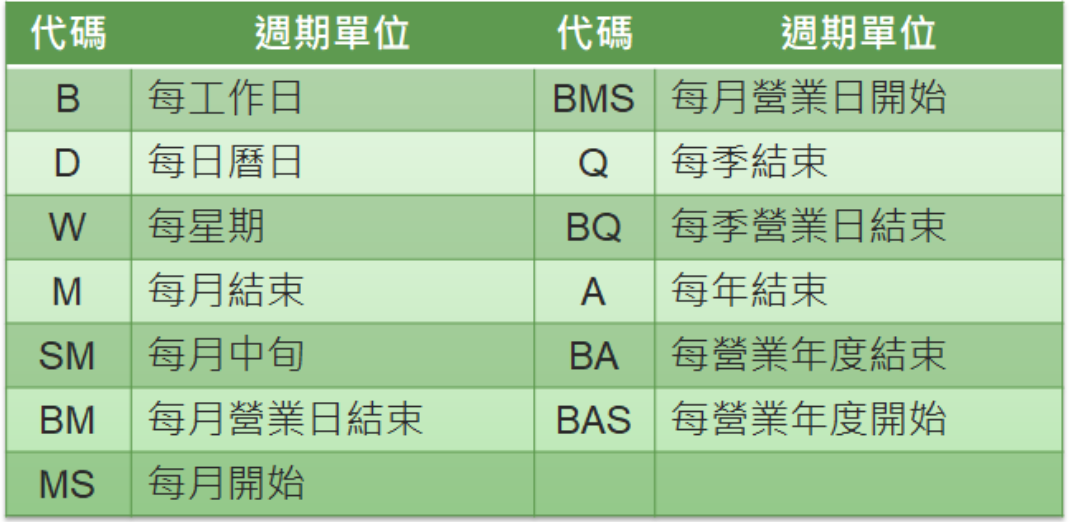

In [3]:
import pandas as pd
a=pd.date_range('10/10/2018', periods=10)#10天
print(a)
print("-------------")
a=pd.date_range('10/10/2018', periods=10,freq="W")#間隔為7天
print(a)
print(type(a))
print("-------------")
s1 = pd.Series(a)
print(s1)
print("-------------")
a=pd.date_range('10/10/2018', periods=5,freq="W")#間隔為7天
df = pd.DataFrame({"Time":a},index=["A","B","C","D","E"])
print(df)
print("-------------")
print(df["Time"].dt.year)#輸出所有的year
print(df["Time"].dt.month)#輸出所有的month

DatetimeIndex(['2018-10-10', '2018-10-11', '2018-10-12', '2018-10-13',
               '2018-10-14', '2018-10-15', '2018-10-16', '2018-10-17',
               '2018-10-18', '2018-10-19'],
              dtype='datetime64[ns]', freq='D')
-------------
DatetimeIndex(['2018-10-14', '2018-10-21', '2018-10-28', '2018-11-04',
               '2018-11-11', '2018-11-18', '2018-11-25', '2018-12-02',
               '2018-12-09', '2018-12-16'],
              dtype='datetime64[ns]', freq='W-SUN')
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
-------------
0   2018-10-14
1   2018-10-21
2   2018-10-28
3   2018-11-04
4   2018-11-11
5   2018-11-18
6   2018-11-25
7   2018-12-02
8   2018-12-09
9   2018-12-16
dtype: datetime64[ns]
-------------
        Time
A 2018-10-14
B 2018-10-21
C 2018-10-28
D 2018-11-04
E 2018-11-11
-------------
A    2018
B    2018
C    2018
D    2018
E    2018
Name: Time, dtype: int64
A    10
B    10
C    10
D    11
E    11
Name: Time, dtype: int64


In [4]:
import pandas as pd
from datetime  import datetime
start = datetime(2018, 10, 10) #新版改為 使用datetime套件
end = datetime(2018, 12, 25)
a=pd.date_range(start, end)#有假日
b=pd.bdate_range(start,end)#無假日 工作天
c=pd.date_range(start,end,freq="M") #每月結束
print(a)
print("-------------")
print(b)
print("-------------")
print(c)
print("-------------")

DatetimeIndex(['2018-10-10', '2018-10-11', '2018-10-12', '2018-10-13',
               '2018-10-14', '2018-10-15', '2018-10-16', '2018-10-17',
               '2018-10-18', '2018-10-19', '2018-10-20', '2018-10-21',
               '2018-10-22', '2018-10-23', '2018-10-24', '2018-10-25',
               '2018-10-26', '2018-10-27', '2018-10-28', '2018-10-29',
               '2018-10-30', '2018-10-31', '2018-11-01', '2018-11-02',
               '2018-11-03', '2018-11-04', '2018-11-05', '2018-11-06',
               '2018-11-07', '2018-11-08', '2018-11-09', '2018-11-10',
               '2018-11-11', '2018-11-12', '2018-11-13', '2018-11-14',
               '2018-11-15', '2018-11-16', '2018-11-17', '2018-11-18',
               '2018-11-19', '2018-11-20', '2018-11-21', '2018-11-22',
               '2018-11-23', '2018-11-24', '2018-11-25', '2018-11-26',
               '2018-11-27', '2018-11-28', '2018-11-29', '2018-11-30',
               '2018-12-01', '2018-12-02', '2018-12-03', '2018-12-04',
      

### to_datatime() 
字串轉日期

In [5]:
import pandas as pd
df = pd.read_csv("./flowdata.csv")
df["Time"] = pd.to_datetime(df["Time"])
df2 = df.set_index("Time")
print(df2)

                      L06_347  LS06_347  LS06_348
Time                                             
2009-01-01 00:00:00  0.137417  0.097500  0.016833
2009-01-01 03:00:00  0.131250  0.088833  0.016417
2009-01-01 06:00:00  0.113500  0.091250  0.016750
2009-01-01 09:00:00  0.135750  0.091500  0.016250
2009-01-01 12:00:00  0.140917  0.096167  0.017000
...                       ...       ...       ...
2013-01-01 12:00:00  1.710000  1.710000  0.129583
2013-01-01 15:00:00  1.420000  1.420000  0.096333
2013-01-01 18:00:00  1.178583  1.178583  0.083083
2013-01-01 21:00:00  0.898250  0.898250  0.077167
2013-01-02 00:00:00  0.860000  0.860000  0.075000

[11697 rows x 3 columns]


In [11]:
import pandas as pd
# date_parser=True 是否要將index做data_parser
df = pd.read_csv("./flowdata.csv",index_col=0,parse_dates=True)
print(df)

                      L06_347  LS06_347  LS06_348
Time                                             
2009-01-01 00:00:00  0.137417  0.097500  0.016833
2009-01-01 03:00:00  0.131250  0.088833  0.016417
2009-01-01 06:00:00  0.113500  0.091250  0.016750
2009-01-01 09:00:00  0.135750  0.091500  0.016250
2009-01-01 12:00:00  0.140917  0.096167  0.017000
...                       ...       ...       ...
2013-01-01 12:00:00  1.710000  1.710000  0.129583
2013-01-01 15:00:00  1.420000  1.420000  0.096333
2013-01-01 18:00:00  1.178583  1.178583  0.083083
2013-01-01 21:00:00  0.898250  0.898250  0.077167
2013-01-02 00:00:00  0.860000  0.860000  0.075000

[11697 rows x 3 columns]
                      L06_347  LS06_347  LS06_348
Time                                             
2010-01-01 00:00:00  0.535083  0.644750  0.061917
2010-01-01 03:00:00  0.493000  0.607000  0.058833
2010-01-01 06:00:00  0.464667  0.565750  0.055333
2010-01-01 09:00:00  0.448167  0.524583  0.052000
2010-01-01 12:00:00  0.4

In [12]:
print(df.loc["2010-01-01":"2012-01-01"]) #使用日期做切片

                      L06_347  LS06_347  LS06_348
Time                                             
2010-01-01 00:00:00  0.535083  0.644750  0.061917
2010-01-01 03:00:00  0.493000  0.607000  0.058833
2010-01-01 06:00:00  0.464667  0.565750  0.055333
2010-01-01 09:00:00  0.448167  0.524583  0.052000
2010-01-01 12:00:00  0.436333  0.499333  0.050750
...                       ...       ...       ...
2012-01-01 09:00:00  0.330750  0.293583  0.029750
2012-01-01 12:00:00  0.295000  0.285167  0.031750
2012-01-01 15:00:00  0.301417  0.287750  0.031417
2012-01-01 18:00:00  0.322083  0.304167  0.038083
2012-01-01 21:00:00  0.355417  0.346500  0.080917

[5848 rows x 3 columns]


In [14]:
print(df[df.index.month == 1])#所有1月份的都查出
print("=========================")
print(df.between_time("08:00","12:00"))#查詢8~12點的

                      L06_347  LS06_347  LS06_348
Time                                             
2009-01-01 00:00:00  0.137417  0.097500  0.016833
2009-01-01 03:00:00  0.131250  0.088833  0.016417
2009-01-01 06:00:00  0.113500  0.091250  0.016750
2009-01-01 09:00:00  0.135750  0.091500  0.016250
2009-01-01 12:00:00  0.140917  0.096167  0.017000
...                       ...       ...       ...
2013-01-01 12:00:00  1.710000  1.710000  0.129583
2013-01-01 15:00:00  1.420000  1.420000  0.096333
2013-01-01 18:00:00  1.178583  1.178583  0.083083
2013-01-01 21:00:00  0.898250  0.898250  0.077167
2013-01-02 00:00:00  0.860000  0.860000  0.075000

[1001 rows x 3 columns]
                      L06_347  LS06_347  LS06_348
Time                                             
2009-01-01 09:00:00  0.135750  0.091500  0.016250
2009-01-01 12:00:00  0.140917  0.096167  0.017000
2009-01-02 09:00:00  0.141917  0.097083  0.016417
2009-01-02 12:00:00  0.147833  0.101917  0.016417
2009-01-03 09:00:00  0.12

## 使用中括弧
+ 要選取某個欄位使用中括號格可 [ ]。
+ 多個欄位可以使用 list。
+ 若是某個範圍的資料篩選，可使用兩次的中括號篩選，第一個是 row，第二個是 column。

In [21]:
import pandas as pd
import data1
df = pd.DataFrame(
data1.data1,
columns = ["name", "city", "population"],
index=data1.data2)

print(df[["city"]])
print("-------")
print(df[["city","name"]])
print("-------")
print(df[2:5])#取得隱含index為2~4的row
print("-------")
print(df[2:5][["city","name"]])
print("-------")
list1=["city","name"]
print(df[3:6][list1])
print("-------")
print(df["city"])#取得Colum
print("-------")
print(df["second":"sixth"][["city","name"]] )#取得"second":"sixth" 區間的row
print("-------")
# print(df["second"])# 會判斷為取得名為second的Colum 
print("-------")
print(df.loc['second'])# 取得row 必須使用明確index模式

           city
first       台北市
second      新北市
third       桃園市
fourth      台中市
fifth       台南市
sixth       高雄市
seventh     台北市
eigth       新北市
ninth       桃園市
tenth       高雄市
eleventh    高雄市
twelvth     台北市
thirteenth  新北市
-------
           city name
first       台北市  中正區
second      新北市  板橋區
third       桃園市  桃園區
fourth      台中市  北屯區
fifth       台南市  安南區
sixth       高雄市  三民區
seventh     台北市  大安區
eigth       新北市  永和區
ninth       桃園市  八德區
tenth       高雄市  前鎮區
eleventh    高雄市  鳳山區
twelvth     台北市  信義區
thirteenth  新北市  新店區
-------
       name city  population
third   桃園區  桃園市      441287
fourth  北屯區  台中市      275207
fifth   安南區  台南市      192327
-------
       city name
third   桃園市  桃園區
fourth  台中市  北屯區
fifth   台南市  安南區
-------
       city name
fourth  台中市  北屯區
fifth   台南市  安南區
sixth   高雄市  三民區
-------
first         台北市
second        新北市
third         桃園市
fourth        台中市
fifth         台南市
sixth         高雄市
seventh       台北市
eigth         新北市
ninth         桃園市
tenth         高雄市
eleventh  

### 使用 loc(文字 m:n 會包含到n)
+ .loc[ ], 中括弧裡面是先 row 後 column，以逗號分開。
+ row 與 column 要放入的是 row 標籤與 column 標籤。
+ 可於 row 或 column 加入「：」 ，代表指定起訖範圍。

In [27]:
import pandas as pd
import numpy as np
dates=pd.date_range('20180516',periods=6)
df=pd.DataFrame(np.arange(24).reshape(6,4),index=dates,columns=['a','b','c','d'])
print(df.loc[:,['a','b']])
print("------------")
print(df.loc['20180517':,['a','b']])
print("------------")
print(df.loc['20180517':,['b']])
print("------------")
print(df.loc['20180518':'20180520','b':'d']) #會包含到20180520

             a   b
2018-05-16   0   1
2018-05-17   4   5
2018-05-18   8   9
2018-05-19  12  13
2018-05-20  16  17
2018-05-21  20  21
------------
             a   b
2018-05-17   4   5
2018-05-18   8   9
2018-05-19  12  13
2018-05-20  16  17
2018-05-21  20  21
------------
             b
2018-05-17   5
2018-05-18   9
2018-05-19  13
2018-05-20  17
2018-05-21  21
------------
             b   c   d
2018-05-18   9  10  11
2018-05-19  13  14  15
2018-05-20  17  18  19


### 使用 iloc 與 ix
iloc[ ] 與 loc 一樣，中括弧裡面也是先 row 後 column，行列標籤用逗號分開。
與 loc 不同的之處是，.iloc 是根據索引來進行選擇。
.ix 代表可以混用 loc 的標籤也可以使用 iloc 的索引編號。 不建議用

In [28]:
import pandas as pd
groups = ["Python", "Django", "Sqlite", "Numpy", "Security", "Pandas"]
numbers = [59, 9, 19, 14, 6, 77]
group_dict = {
"groups": groups,
"numbers": numbers
}
df1 = pd.DataFrame(group_dict)
print(df1)
print("--------------")
print(df1.iloc[0:1, 1])
print("------------")
print(df1.iloc[0:1,:])
print(type(df1.iloc[0:1,:]))#DataFrame
print("------------")
d1 = df1.iloc[:,1] 
print(d1)
print(type(d1))#Series
print("------------")
d1 = df1["numbers"]
print(df1.numbers)
print(type(d1))#Series
print("------------")
print(df1.iloc[2])

     groups  numbers
0    Python       59
1    Django        9
2    Sqlite       19
3     Numpy       14
4  Security        6
5    Pandas       77
--------------
0    59
Name: numbers, dtype: int64
------------
   groups  numbers
0  Python       59
<class 'pandas.core.frame.DataFrame'>
------------
0    59
1     9
2    19
3    14
4     6
5    77
Name: numbers, dtype: int64
<class 'pandas.core.series.Series'>
------------
0    59
1     9
2    19
3    14
4     6
5    77
Name: numbers, dtype: int64
<class 'pandas.core.series.Series'>
------------
groups     Sqlite
numbers        19
Name: 2, dtype: object


## 作業：開啟檔案計算各種資訊
+ 請開啟 HW15__Data.csv，開啟時加入參數 usecols=(x, y) ，代表使用 index=x 與 index=y 的 column。
請列出收盤價與成交量。
+ 加權平均代表以成交量作為權重。

In [35]:
import numpy as np
x,y=np.loadtxt('HW15__Data.csv',delimiter=',',skiprows=1,usecols=(4,5),unpack=True)
print(x,y)
print("收盤價加權平均",np.average(x,weights=y))

[104.08 110.26  96.8  ...  26.87  26.37  26.5 ] [70749800. 54967000. 79260700. ...  5444000.  2346400.  2981600.]
收盤價加權平均 63.11373661448603


# 關於跳脫字元符號
+ 由於正規表示式使用\符號針對特殊字元進行轉換，例如若想要查詢這個字串 'pcschool.com'，我們使用的正規表示式方式為 'pcschool\.com'。
+ Python 的字串也是使用\符號進行特殊字元轉換，上述的正規表示式於Python 內可寫成 'pcschool\\.com' ，如此寫法會有很多 \ 符號出現的困擾。
+ 建議可於字串前面加上 r 的前導符號就可以，所以上面的範例可改為：
 'r'python\.com' 

## findall 方法
+ findall(搜尋字串,起始位置,結束位置)
  + 找到所有符合正則表達式的內容
  + 起始位置與結束位置是可選擇的參數，預設值分別為 0 與字串長度。
  + findall 將以 list 方式傳回所有可以比對的資料，若找不到可以比對的資料則會傳回一個空的 list。

## 設定跳脫與首尾
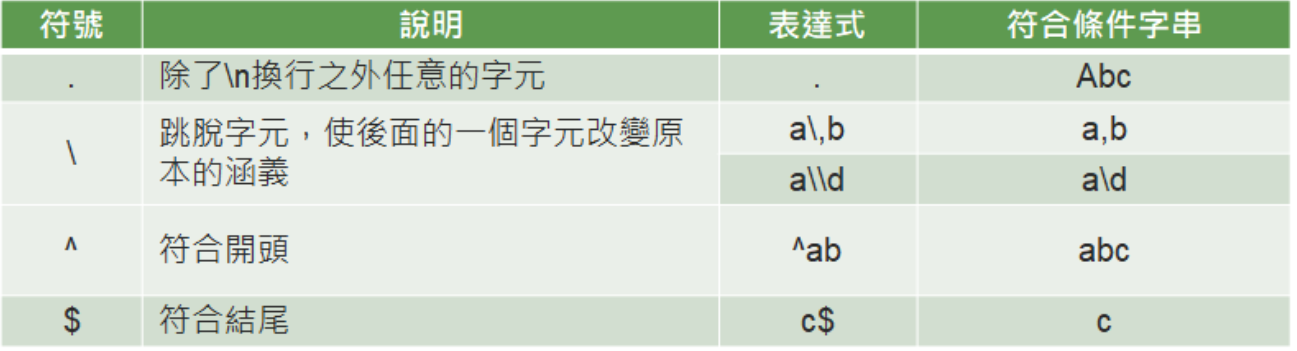
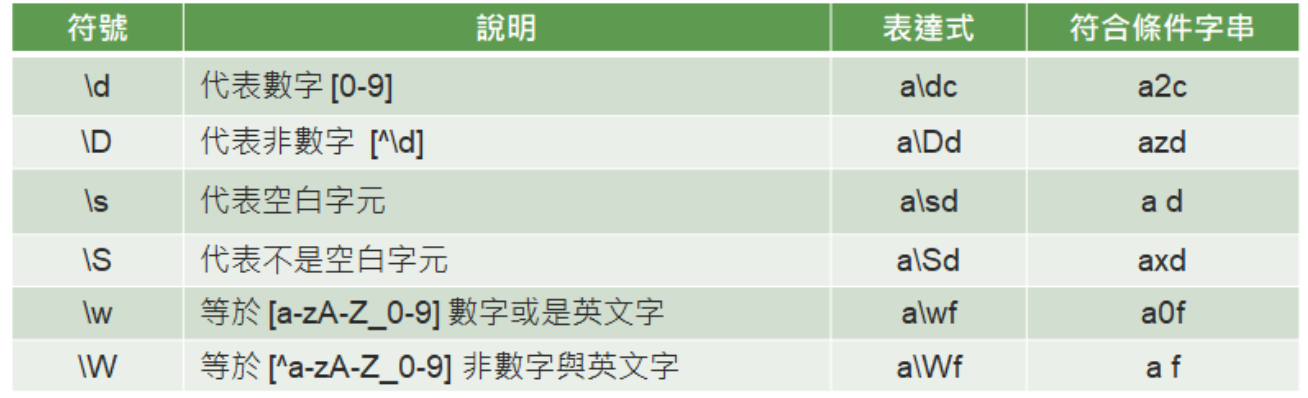


In [36]:
import re
s = "Tim's phone numbers are 12345-41521 and 78963-85214"
match = re.findall(r'\d', s)
if match:
    print(match)

['1', '2', '3', '4', '5', '4', '1', '5', '2', '1', '7', '8', '9', '6', '3', '8', '5', '2', '1', '4']


## 計算字元數
+ 定義字元數 
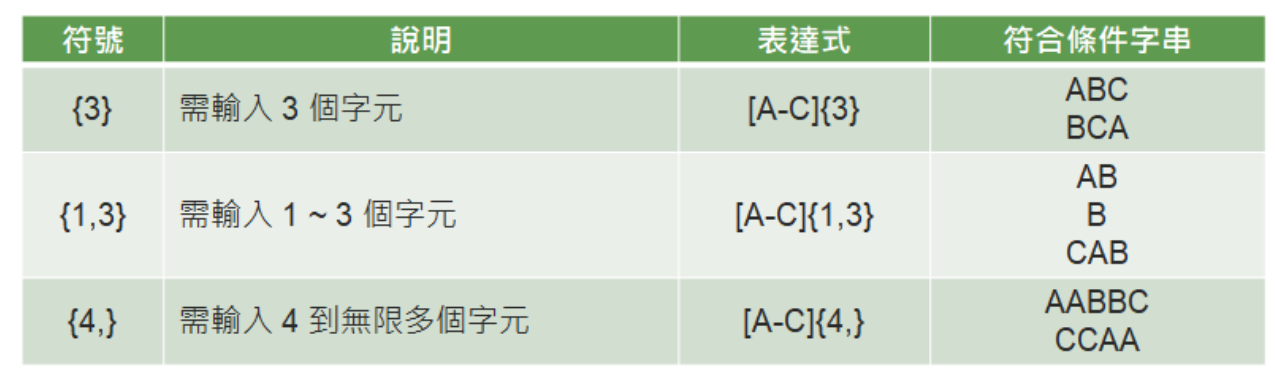

In [37]:
import re
s = "Tim's phone numbers are 12345-41521 and 78963-85214"
match = re.findall(r'\d{5}', s)
if match:
    print(match)


['12345', '41521', '78963', '85214']


## 依據尋找的字元範圍
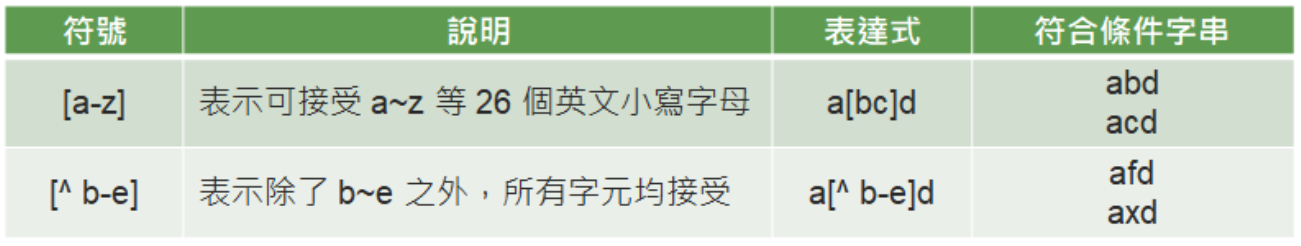

In [41]:
import re
ptn = r"r[au]n " #空格是否會影響? 找到"ran "" r到n中間可以是a或u其中一個 再接一個空白
#ptn = r"r[au]n" # 找到 ran與run r到n中間可以是a或u其中一個
#ptn = r"r[a-u]n" #['ran', 'run', 'rin']r到n中間可以是a b c d e f g h i j h l m n o p q r s t u 之間的任意一個
#ptn = r"r[a-u]{1,3}n" #['ran', 'run', 'rain', 'rin']r到n中間可以是a b c d e f g h i j h l m n o p q r s t u數量為1或3各
print(re.findall(ptn, "dog ran  runs to cat rain rin"))

['ran', 'run', 'rain', 'rin']


In [42]:
import re
string1="1dog  cat2  3rabbit "
print(re.findall(r"[A-Z]",string1))
print(re.findall(r"[a-c]",string1))
print(re.findall(r"[0-9]",string1))
print(re.findall(r"[^a-c]",string1)) #除了a~c之外的

[]
['c', 'a', 'a', 'b', 'b']
['1', '2', '3']
['1', 'd', 'o', 'g', ' ', ' ', 't', '2', ' ', ' ', '3', 'r', 'i', 't', ' ']


## 計算重複數量
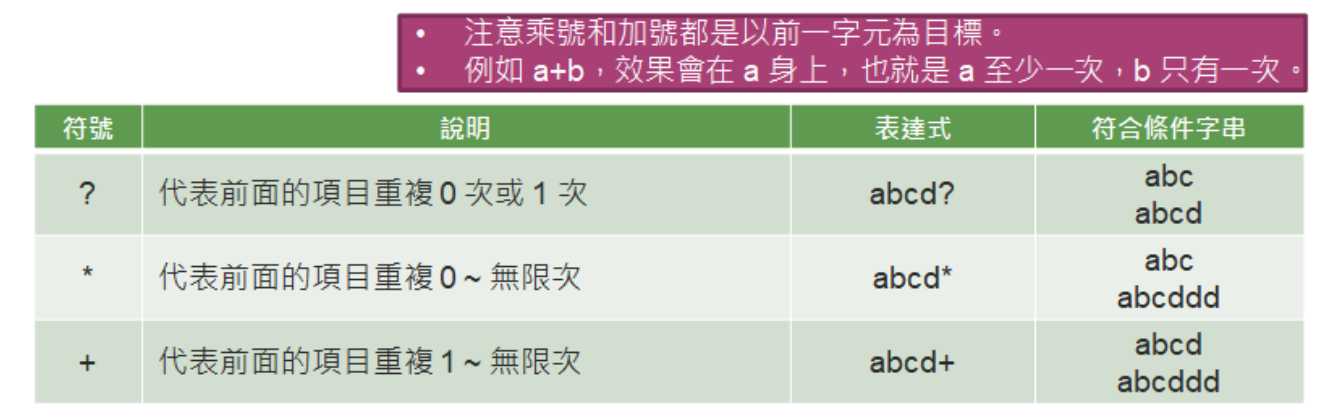

In [43]:
import re
pattern = re.compile(r'\d+')  
result1 = pattern.findall('hello 123456 789')
result2 = pattern.findall('one1two2three3four4', 0, 13)
print(result1  )#['123456', '789']
print(result2  )#['1', '2'] 0~不包含13的區間搜尋數字

['123456', '789']
['1', '2']


In [52]:
import re
str1="abcd abcdd abcb abc aaaa"
print(re.findall(r"abcd?", str1))
print(re.findall(r"abcd*",str1))
print(re.findall(r"abcd+",str1))
print(re.findall(r"[a-c]{3}", str1))#abc任意字母組合必須出現3次
print(re.findall(r"[a-c]{1,4}", str1))#abc任意字母組合必須出現1~3次
print(re.findall(r"[a-c]{4,}",str1))#abc任意字母組合最少4次最多無限


['abcd', 'abcd', 'abc', 'abc']
['abcd', 'abcdd', 'abc', 'abc']
['abcd', 'abcdd']
['abc', 'abc', 'abc', 'abc', 'aaa']
['abc', 'abc', 'abcb', 'abc', 'aaaa']
['abcb', 'aaaa']


## 請問執行後的結果是哪幾個？

In [53]:
import re
string1="C++ Python Java C# Sqlite Django Numpy Pandas "
print(re.findall(r"[p-t]",string1))#p q r s t 

['t', 'q', 't', 'p', 's']


## split 方法
+ split 方法能以比對規則針對字串進行切割後產生 list。
+ split 它的使用形式如下：
+ split(字串,最大分割次數)
   + 若不指定最大分割次數則全部分割

In [54]:
import re
text = 'one, two...ten'
re1=re.split('[,. ]+', text)#碰到,或.或 空白 1次或多次都需要分割
print(re1)
re1=re.split('[,. ]+', text, maxsplit=1)
print(re1)

['one', 'two', 'ten']
['one', 'two...ten']


## sub 方法
+ sub 方法用於替換，它的使用形式如下
  + sub(取代的字串或函數,來源字串,可設定被取代的數量)
+ 可設定被取代的數量若不指定時全部替換。


## 字串取代
+ inputStr = "hello 111 world 111"	
+ replacedStr = inputStr.replace("111", "222")
+ 可是假設所有數字都想換成 222，而字串內的數值可能改變，例如
+ inputStr = "hello 123 world 456"
+ 那該如何進行?

In [55]:
import re
inputStr = "hello 123 world 456"
replacedStr = re.sub('\d+',"222",inputStr)
print(replacedStr)
replacedStr = re.sub("\d+", "222 ", inputStr,count=1) 
print(replacedStr)

hello 222 world 222
hello 222  world 456


# 切割與合併

## row 的切割與合併
+ row 代表第一維，代表 axis=0，也可說水平的一列一列。
+ 可使用 vsplit 方式進行切割，可指定要切割的數量。
   + 回傳一組list內包含 ndArray
+ 可使用 vstack 方式進行合併。

In [60]:
import numpy as np
a = np.arange(12).reshape(3, 4)
print(a)
print("---------------")
print(np.vsplit(a,3))
print("---------------")
print(np.vsplit(a,3)[1])
print("---------------")
print(type(np.vsplit(a,3)))
print("---------------")
b=np.arange(12,24).reshape(3, 4)
print(b)
print("---------------")
c=np.vstack((a,b))
print(c)
print("---------------")

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
---------------
[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]
---------------
[[4 5 6 7]]
---------------
<class 'list'>
---------------
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
---------------
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
---------------


## column 的切割與合併
+ column 代表第二維，代表 axis=1，也可說垂直的一行一行。
+ 可使用 hsplit 方式進行切割，可指定要切割的數量。
+ 可使用 hstack 方式進行合併。

In [62]:
import numpy as np
a = np.arange(12).reshape(3, 4)
print(a)
print("---------------")
print(np.hsplit(a,4))#切分為4組array
# 12/4 = 3 因為是3x4的Array的 所以3/3 = 1 
# 每組Array包含 3x1的陣列  row=3是因為原始陣列為3x4  col=1
print("---------------")
print(np.hsplit(a,2))#切分為2組array
print("---------------")
# 12/2 = 6 因為是3x4的Array的 所以6/3 = 2
# 每組Array包含 3x2的陣列  row=3是因為原始陣列為3x4  col=2
b=np.arange(12,24).reshape(3, 4)
print(b)
print("---------------")
c=np.hstack((a,b))
print(c)
print("---------------")

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
---------------
[array([[0],
       [4],
       [8]]), array([[1],
       [5],
       [9]]), array([[ 2],
       [ 6],
       [10]]), array([[ 3],
       [ 7],
       [11]])]
---------------
[array([[0, 1],
       [4, 5],
       [8, 9]]), array([[ 2,  3],
       [ 6,  7],
       [10, 11]])]
---------------
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
---------------
[[ 0  1  2  3 12 13 14 15]
 [ 4  5  6  7 16 17 18 19]
 [ 8  9 10 11 20 21 22 23]]
---------------


## 可選擇行列分合
+ split 代表切割的動作：
  + 若 axis 為 0 代表 row 切割，等同於 vsplit。
  + 若 axis 為 1 代表 column 切割，等同於 hsplit。
  + np.split(a,3,axis=0) #3 代表切割數。
+ concatenate 代表進行合併：
  + 若 axis 為 0 代表 row 合併，等同於 vstack。
  + 若 axis 為 1 代表 column 合併，等同於 hstack。

In [66]:
import numpy as np
a = np.arange(12).reshape(3, 4)
print(a)
print("---------------")
print(np.split(a,3,axis=0))
print("---------------")
print(np.split(a,2,axis=1))
print("---------------")

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
---------------
[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]
---------------
[array([[0, 1],
       [4, 5],
       [8, 9]]), array([[ 2,  3],
       [ 6,  7],
       [10, 11]])]
---------------


In [64]:
import numpy as np
a = np.arange(12).reshape(3, 4)
b = np.arange(12,24).reshape(3, 4)
c = np.concatenate((a,b),axis=0)
print(c)
print("---------------")
c=np.concatenate((a,b),axis=1)
print(c)
print("---------------")

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
---------------
[[ 0  1  2  3 12 13 14 15]
 [ 4  5  6  7 16 17 18 19]
 [ 8  9 10 11 20 21 22 23]]
---------------


## 不等量切割
+ 利用 array_split 方法進行不等量的切割。
+ 例如：
  + np.array_split(a,3,axis=1) 3 代表切割數
  + 對於長度為x的Array，分割成n個部分，它返回x % n個大小為(x // n) + 1的子Array，以及其他大小為(x // n)的子Array。

In [67]:
import numpy as np
a = np.arange(12).reshape(3,4)
print(a)
print(np.array_split(a,2,axis=0))
# 軸0的長度為3 
# 3%2 = 1 
# 3/2取整數 + 1 = 2
#由以上得知 會產生一1組在axis=0的位置放入長度為2的子陣列 
# 剩下的子陣列為3/2 = 1 產生長度為1的子陣列

print("-------------------")
print(np.array_split(a,3,axis=1))
#axis 1的長度為4 
# 4 % 3 = 1
# 4 / 3 = 1 + 1 = 2 
#會產生一1組在axis=1的位置 放入長度為2的子陣列 
# 剩下的子陣列為4/3=1 產生長度為1的子陣列
#axis 0的長度為3 所以每組陣列產生3各row

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[array([[0, 1, 2, 3],
       [4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]
-------------------
[array([[0, 1],
       [4, 5],
       [8, 9]]), array([[ 2],
       [ 6],
       [10]]), array([[ 3],
       [ 7],
       [11]])]
